In [4]:
import sys
sys.path.append('D:\\Prywatne\\jul\\anaconda\\Lib\\site-packages ')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CompressTree import CompressTree
from numpy.linalg import svd
from  timeit import default_timer as timer
from TreeDraw import draw_tree
from CompressTree import CompressTree
from numpy.linalg import svd
from copy import deepcopy
from TreeDraw import draw_tree
from SparseDraw import sparse_draw
from sklearn.utils.extmath import randomized_svd
from MatrixGenerator import generate_3d_matrix
from Permutation import  *

In [5]:
from matplotlib.pyplot import spy
def measure_algorithm():
    results = []
    for k in range(2, 4):
        algos = [minimum_degree_permutation,cuthill_mckee, reversed_cuthill_mckee]
        algos_names = ["minimum_degree_permutation", "cuthill_mckee", "reversed_cuthill_mckee"]
        for fun in algos:
            X = generate_3d_matrix(k)
            X_cpy = deepcopy(X)
            U, Sigma, V = svd(X_cpy)
            s_names = ["pierwszej", "środkowej", "ostatniej"]
            sses = [1,len(Sigma)//2, -1]
            n = 2**(3*k)
            for s in sses:
                root = CompressTree(X_cpy, 0, len(X_cpy), 0, len(X_cpy[0]))
                sparse_draw(X, f"wzorzec rzadkości przed \n kompresją i permutacją\n dla algorytmu {algos_names[algos.index(fun)]} \nsigmy {s_names[sses.index(s)]} k {k}")
                root.create_tree(2, Sigma[s])
                draw_tree(root, f'macierz przed permutacją \npo kompresji dla \nalgorytmu {algos_names[algos.index(fun)]}\n sigmy {s_names[sses.index(s)]} k {k}')
                compress_orig = root.compute_compression()/(n*n)

                perm = fun(X)
                N = permutate(X, perm)
                root = CompressTree(N, 0, len(N), 0 , len(N[0]))
                U, Sigma, V = svd(N)
                root.create_tree(2, Sigma[s])
                sparse_draw(N, f"wzorzec rzadkości przed \nkompresją po permutacji\n dla algorytmu {algos_names[algos.index(fun)]} \nsigmy {s_names[sses.index(s)]} k {k} ")
                draw_tree(root, f'macierz po permutacją i\n po kompresji\n dla algorytmu {algos_names[algos.index(fun)]} \nsigmy {s_names[sses.index(s)]} k {k}')
                compress_perm = root.compute_compression()/(n*n)
                results.append([k, s, algos.index(fun), compress_orig, compress_perm])
    df = pd.DataFrame(results, columns=["k", "s", "Alg", "comperss original", "compress permutation"])
    return df


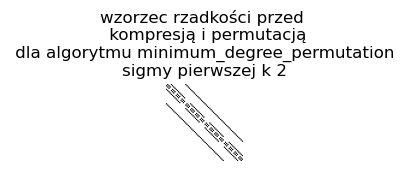

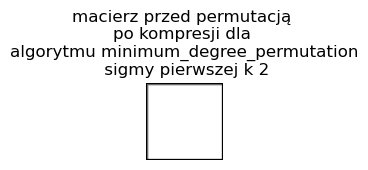

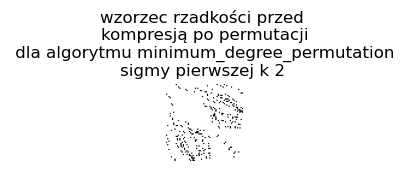

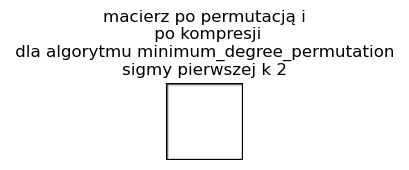

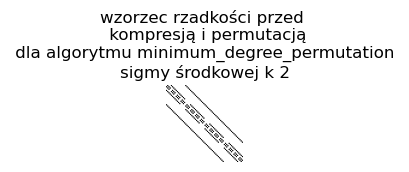

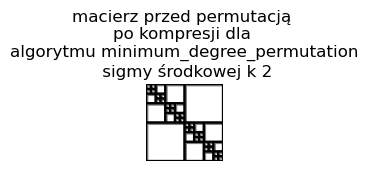

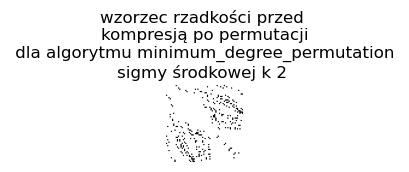

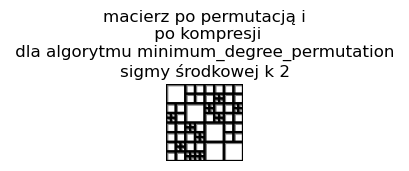

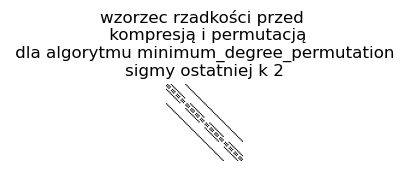

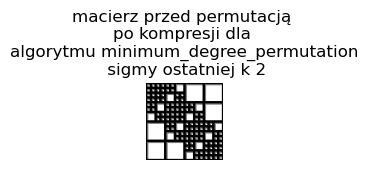

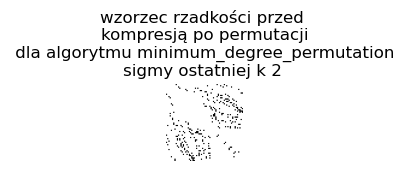

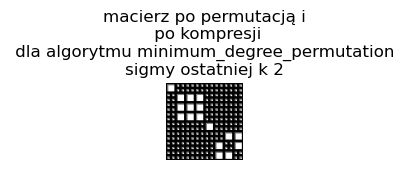

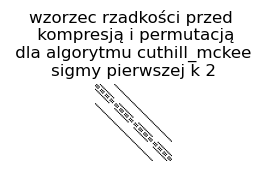

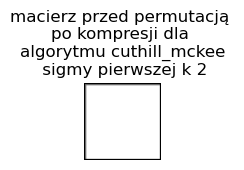

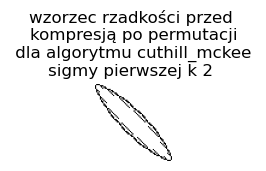

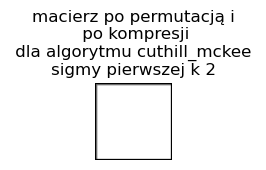

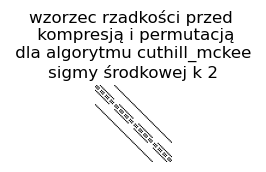

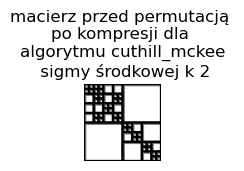

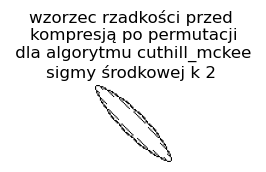

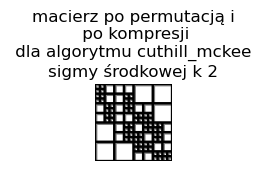

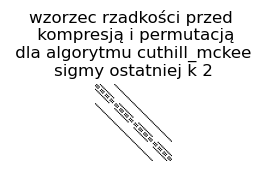

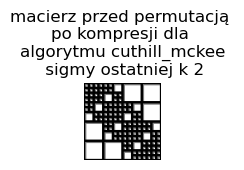

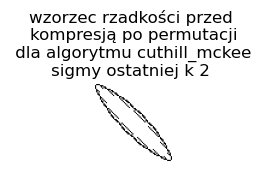

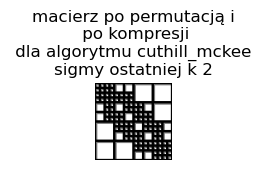

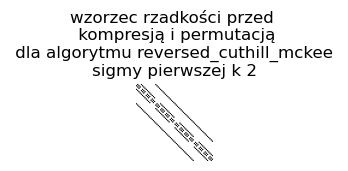

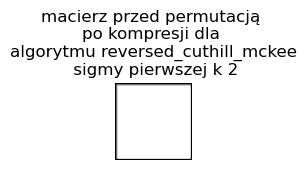

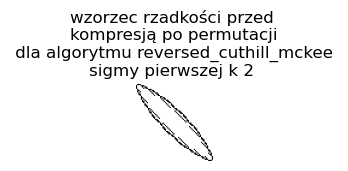

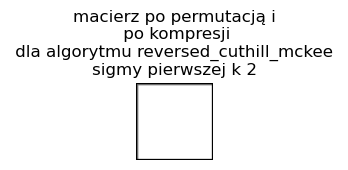

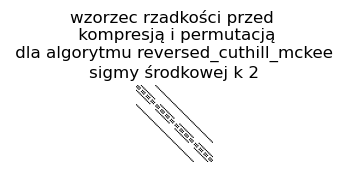

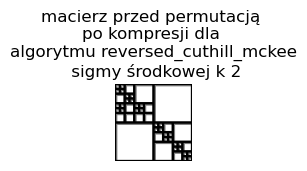

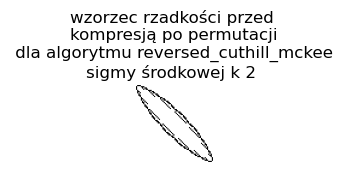

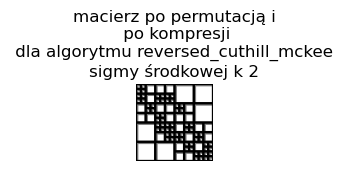

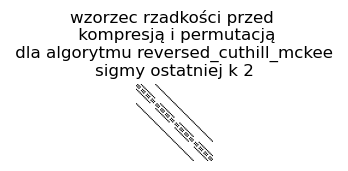

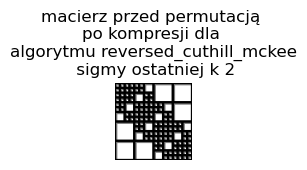

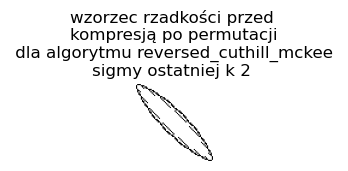

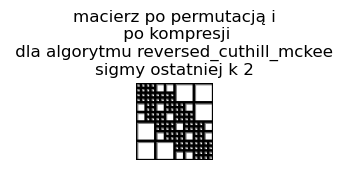

In [6]:
df = measure_algorithm()

In [12]:
df

,k,s,Alg,comperss original,compress permutation
0,2,1,0,0.062988,0.062988
1,2,32,0,0.334961,0.538574
2,2,-1,0,0.688477,0.967285
3,2,1,1,0.062988,0.062988
4,2,32,1,0.396973,0.595703
5,2,-1,1,0.688477,0.669922
6,2,1,2,0.062988,0.062988
7,2,32,2,0.352051,0.586426
8,2,-1,2,0.688477,0.669922


In [8]:
import seaborn as sns
def plot_features(df):
    to_draw = [[0 for  _ in range (3)] for _ in range(3)]
    for ind, mat in df.iterrows():
        k,s, Alg, compress_orig, compress_perm = mat["k"], mat["s"], mat["Alg"], mat["comperss original"], mat["compress permutation"]
        k_ind = k - 2
        s_ind = 0 if s == 1 else (1 if s != -1 else 2)
        if Alg ==0:
            to_draw[int(s_ind)][int(k_ind)] = compress_orig
    show_err_heatmap(to_draw, "stopień kompresji bez permutacji dla algo minimum_degree_permutation")

    to_draw = [[0 for  _ in range (3)] for _ in range(3)]
    for ind, mat in df.iterrows():
        k,s, Alg, compress_orig, compress_perm = mat["k"], mat["s"], mat["Alg"], mat["comperss original"], mat["compress permutation"]
        k_ind = k - 2
        s_ind = 0 if s == 1 else (1 if s != -1 else 2)
        if Alg ==0:
            to_draw[int(s_ind)][int(k_ind)] = compress_perm
    show_err_heatmap(to_draw, "stopień kompresji z permutacją dla algo minimum_degree_permutation")

    to_draw = [[0 for  _ in range (3)] for _ in range(3)]
    for ind, mat in df.iterrows():
        k,s, Alg, compress_orig, compress_perm = mat["k"], mat["s"], mat["Alg"], mat["comperss original"], mat["compress permutation"]
        k_ind = k - 2
        s_ind = 0 if s == 1 else (1 if s != -1 else 2)
        if Alg ==1:
            to_draw[int(s_ind)][int(k_ind)] = compress_orig
    show_err_heatmap(to_draw, "stopień kompresji bez permutacji dla algo cuthill_mckee")

    to_draw = [[0 for  _ in range (3)] for _ in range(3)]
    for ind, mat in df.iterrows():
        k,s, Alg, compress_orig, compress_perm = mat["k"], mat["s"], mat["Alg"], mat["comperss original"], mat["compress permutation"]
        k_ind = k - 2
        s_ind = 0 if s == 1 else (1 if s != -1 else 2)
        if Alg ==1:
            to_draw[int(s_ind)][int(k_ind)] = compress_perm
    show_err_heatmap(to_draw, "stopień kompresji z permutacją dla algo cuthill_mckee")

    to_draw = [[0 for  _ in range (3)] for _ in range(3)]
    for ind, mat in df.iterrows():
        k,s, Alg, compress_orig, compress_perm = mat["k"], mat["s"], mat["Alg"], mat["comperss original"], mat["compress permutation"]
        k_ind = k - 2
        s_ind = 0 if s == 1 else (1 if s != -1 else 2)
        if Alg ==2:
            to_draw[int(s_ind)][int(k_ind)] = compress_orig
    show_err_heatmap(to_draw, "stopień kompresji bez permutacji dla algo reversed_cuthill_mckee")

    to_draw = [[0 for  _ in range (3)] for _ in range(3)]
    for ind, mat in df.iterrows():
        k,s, Alg, compress_orig, compress_perm = mat["k"], mat["s"], mat["Alg"], mat["comperss original"], mat["compress permutation"]
        k_ind = k - 2
        s_ind = 0 if s == 1 else (1 if s != -1 else 2)
        if Alg ==2:
            to_draw[int(s_ind)][int(k_ind)] = compress_perm
    show_err_heatmap(to_draw, "stopień kompresji z permutacją dla algo reversed_cuthill_mckee")


def show_err_heatmap(df, title):
    plt.figure(figsize=(8, 6))
    s = sns.heatmap(df, cmap="YlGnBu", xticklabels=[2,3,4], yticklabels=[1, "len(s)//2", "len(s)"])
    plt.title(title)
    s.set_xlabel('wykładnik rozmiaru', fontsize=16)
    s.set_ylabel('sigma', fontsize=16)

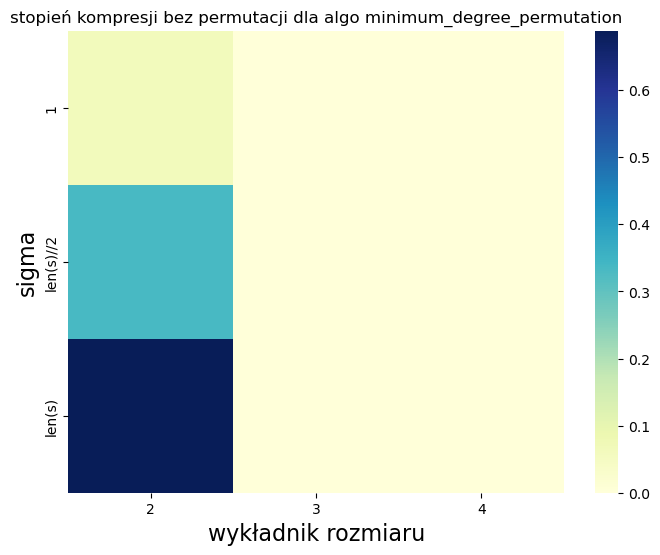

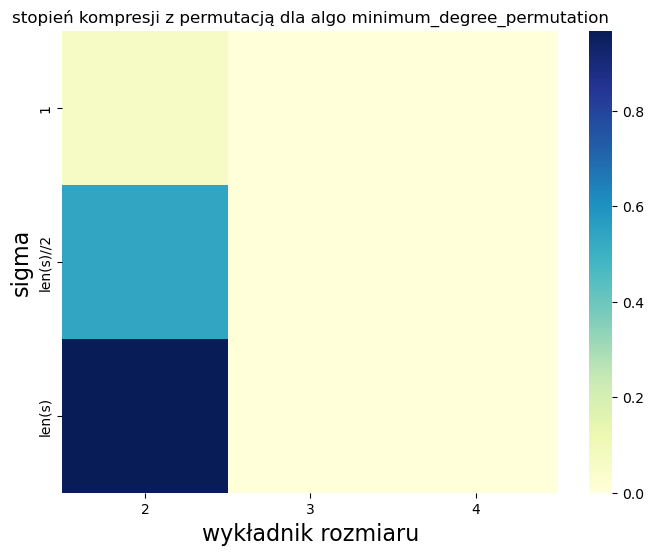

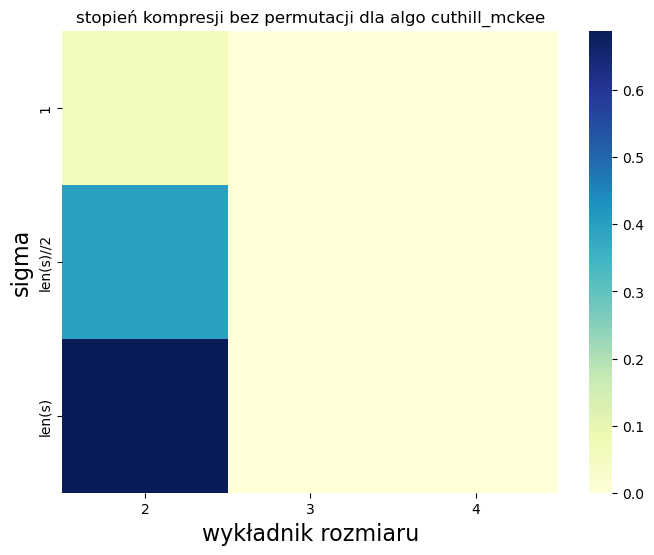

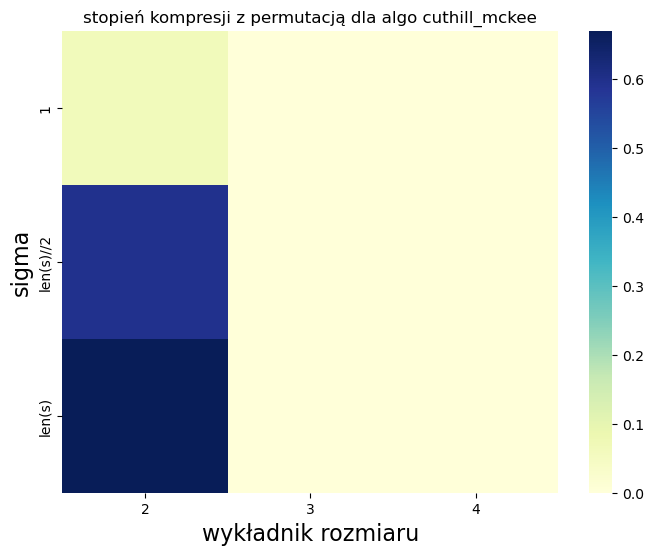

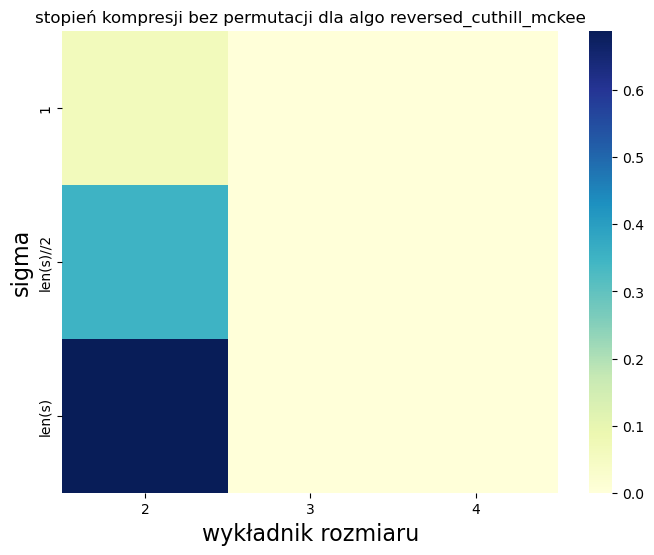

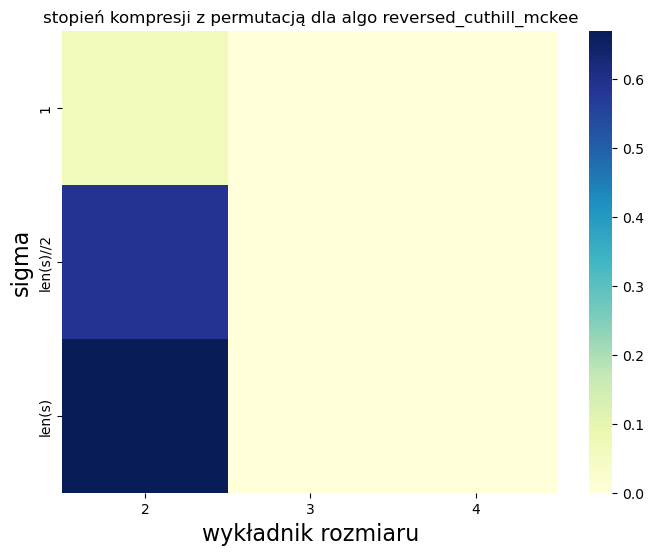

In [9]:
plot_features(df)

In [10]:
from matplotlib import pyplot as plt
def plot_new_things(df):
    # poprawa kompresji a sigma
    improvements = [[[],[],[]],
                    [[],[],[]],
                    [[],[],[]]]
    colors = ["black", "green", "red", "pink", "grey", "blue", "orange", "purple", "yellow"]
    alg_name = ["minimum degree", "Cuthill & McKee", "Odwrócony Cuthill & McKee"]
    for ind, mat in df.iterrows():
        k,s, alg, compress_orig, compress_perm = int(mat["k"]), mat["s"], int(mat["Alg"]), mat["comperss original"], mat["compress permutation"]
        k = k - 2
        s_ind = 0 if s == 1 else (1 if s != -1 else 2)
        improvements[k][alg].append(compress_perm/compress_orig)
        s = [0,1,2]
    fig = plt.figure()
    ax = plt.subplot(111)
    for k in range(3):
        for alg in range(3):
            ax.plot(s,improvements[k][alg],".",color = colors[3*k + alg],label = f"{alg_name[alg]}, k = {k+2}" )
    plt.xticks([0, 1, 2],[str(1), "len(s)//2", "len(s)"])
    plt.yscale('log')
    plt.title("zależność poprawy kompresji od sigmy")
    plt.ylabel("ile razy kompresja z permutacją jest lepsza od tej bez")
    plt.xlabel("sigma")
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    # poprawa kompresji a rozmiar macierzy
    improvements = [[[],[],[]],
                    [[],[],[]],
                    [[],[],[]]]
    s_name = ["pierwsza", "środkowa", "ostatnia"]
    for ind, mat in df.iterrows():
        k,s, alg, compress_orig, compress_perm = int(mat["k"]), mat["s"], int(mat["Alg"]), mat["comperss original"], mat["compress permutation"]
        k = k - 2
        s_ind = 0 if s == 1 else (1 if s != -1 else 2)
        improvements[s_ind][alg].append(compress_perm/compress_orig)
    k = [2**6, 2**9, 2**12]
    fig = plt.figure()
    ax = plt.subplot(111)
    for s in range(3):
        for alg in range(3):
            ax.plot(k,improvements[s][alg],".",color = colors[3*s + alg],label = f"{alg_name[alg]}, sigma {s_name[s]}" )
    plt.yscale('log')
    plt.xscale('log')
    plt.title("zależność poprawy kompresji od rozmiaru macierzy")
    plt.ylabel("ile razy kompresja z permutacją jest lepsza od tej bez")
    plt.xlabel("liczba elementów w wierszu")
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

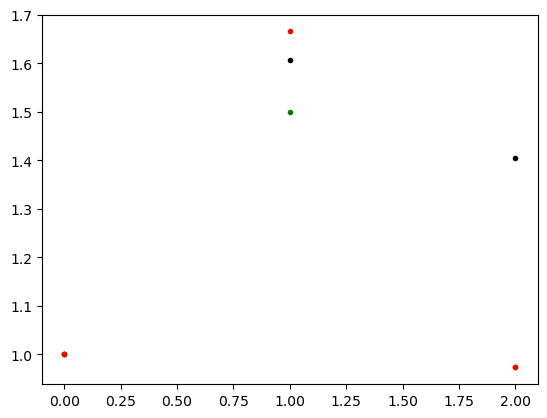

In [11]:
plot_new_things(df)